In [1]:
#데이터 import
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf

In [2]:
red   = pd.read_csv('/content/winequality-red.csv', sep = ',')
white = pd.read_csv('/content/winequality-white.csv', sep = ';')


red.head(),white.head()



(   fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
 0            7.4              0.70         0.00  ...       0.56      9.4        5
 1            7.8              0.88         0.00  ...       0.68      9.8        5
 2            7.8              0.76         0.04  ...       0.65      9.8        5
 3           11.2              0.28         0.56  ...       0.58      9.8        6
 4            7.4              0.70         0.00  ...       0.56      9.4        5
 
 [5 rows x 12 columns],
    fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
 0            7.0              0.27         0.36  ...       0.45      8.8        6
 1            6.3              0.30         0.34  ...       0.49      9.5        6
 2            8.1              0.28         0.40  ...       0.44     10.1        6
 3            7.2              0.23         0.32  ...       0.40      9.9        6
 4            7.2              0.23         0.32  ...       0

In [3]:
red['type'] =  0
white['type'] =  1

In [4]:
wine = pd.concat([red,white])

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.753886
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,1.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,1.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


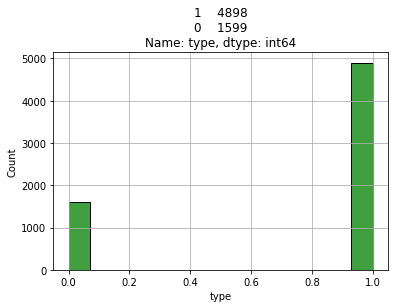

'\nwhite wine 의 수가 red wine 보다 많다 \n채울지 버릴지는 방식에 대한 차이 이다.\n버리는 것 보다 채우는게 이득이다.\n'

In [6]:
sns.histplot(wine['type'],color = 'green')
plt.title('{}'.format(wine['type'].value_counts()))
plt.grid()
plt.show()

'''
white wine 의 수가 red wine 보다 많다 
채울지 버릴지는 방식에 대한 차이 이다.
버리는 것 보다 채우는게 이득이다.
'''

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [8]:
#data shuffleing
wine_shuffle = wine.sample(frac = 1)
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [9]:
#numpy 로 변경
wine_np = wine_shuffle.to_numpy()


In [10]:
#train_test_indexing
train_ratio = 0.8

train_index = int(wine_np.shape[0] * train_ratio)
train_index


5197

In [11]:
#train_test_split
train_x,train_y = wine_np[:train_index,:-1],wine_np[:train_index,-1]
test_x,test_y  =  wine_np[train_index: , :-1] , wine_np[train_index: , -1]

#마지막 종속 변수를 원핫 벡터를 시키기 위해서 이다
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(5197, 12)
(5197,)
(1300, 12)
(1300,)


In [12]:
print(train_y[0])
print(train_y[1])
print(train_y[2])

1.0
1.0
0.0


In [13]:
#종속변수 one hot vector 
train_y_to_categorical = tf.keras.utils.to_categorical(train_y,num_classes=2) #numclasses = one _hot vector 에 필요한 열의 개수 
test_y_to_categorical = tf.keras.utils.to_categorical(test_y,num_classes = 2) #numclasses = one _hot vector 에 필요한 열의 개수
'''
코드의 실수?
함수 의 사용을 그대로 반환 
근데 만약 두번 돌리면 ?? 
'''

'\n코드의 실수?\n함수 의 사용을 그대로 반환 \n근데 만약 두번 돌리면 ?? \n'

In [14]:
print(train_y_to_categorical[0])
print(test_y_to_categorical[1])

[0. 1.]
[1. 0.]


In [15]:
print(train_y_to_categorical.shape)
print(test_y_to_categorical.shape)

(5197, 2)
(1300, 2)


In [16]:
#신경망 구축 
model = tf.keras.Sequential([
                                    tf.keras.layers.Dense(units = 48,activation = 'swish',input_shape = (12,)),
                                    tf.keras.layers.Dense(units = 24,activation = 'swish'),
                                    tf.keras.layers.Dense(units = 12,activation = 'swish'),
                                    tf.keras.layers.Dense(units =2 , activation = 'sigmoid')
                                    
                             ])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.07),loss = 'binary_crossentropy',metrics=['accuracy']) #metrics = 'accuracy' -> 정확도 측정 

In [19]:
history = model.fit(train_x,train_y_to_categorical,epochs=25 , batch_size=36,validation_split=0.2,callbacks=tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',patience=3))

Epoch 1/25
116/116 [==============================] - 1s 3ms/step - loss: 0.6961 - accuracy: 0.8954 - val_loss: 0.1826 - val_accuracy: 0.9510
Epoch 2/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1928 - accuracy: 0.9319 - val_loss: 0.1332 - val_accuracy: 0.9548
Epoch 3/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1860 - accuracy: 0.9377 - val_loss: 0.1257 - val_accuracy: 0.9481
Epoch 4/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1332 - accuracy: 0.9545 - val_loss: 0.1179 - val_accuracy: 0.9683
Epoch 5/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1418 - accuracy: 0.9531 - val_loss: 0.0852 - val_accuracy: 0.9692
Epoch 6/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1179 - accuracy: 0.9620 - val_loss: 0.0718 - val_accuracy: 0.9750
Epoch 7/25
116/116 [==============================] - 0s 2ms/step - loss: 0.1951 - accuracy: 0.9346 - val_loss: 0.1091 - val_accuracy: 0.9567
Epoch 

In [20]:
model.evaluate(test_x,test_y_to_categorical)

41/41 [==============================] - 0s 1ms/step - loss: 0.1424 - accuracy: 0.9669


[0.14235222339630127, 0.9669230580329895]

In [21]:
predict_y = model.predict(test_x)
print(np.round(predict_y[:20])) #서로 각각의 확률 값 출력 이때 1은 아니다.
print(test_y[:20])

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]
[0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1.]


예측 값이 0 
실제값이 1 이면 
mse 에서는 0 -1  ** 2 = 1 이 나온다.

예측값이 1 
실제값이 1 이면
mse 는 무조건 0 이다 .\

데이터 가 한쪽으로 쏠리면 측정 방식에 따라 달라진다.


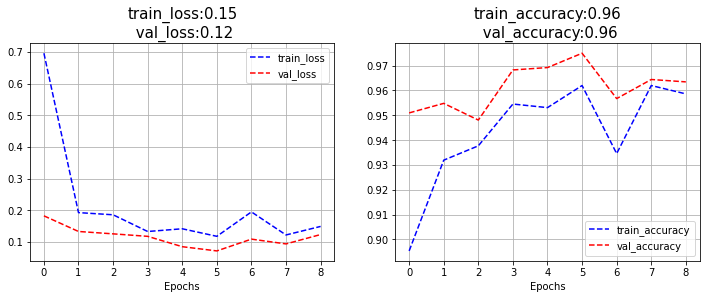

In [23]:
#시각화 
val_accuracy = history.history['val_accuracy']
accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss  = history.history['val_loss']

plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
plt.plot(history.history['loss'],'b--',label = 'train_loss')
plt.plot(history.history['val_loss'],'r--',label = 'val_loss')
plt.xlabel('Epochs')
plt.title('train_loss:{:.2f}\n val_loss:{:.2f}'.format(train_loss[-1],val_loss[-1]),fontsize = 15)

plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'],'b--',label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],'r--',label = 'val_accuracy')
plt.xlabel('Epochs')
plt.title('train_accuracy:{:.2f}\n val_accuracy:{:.2f}'.format(accuracy[-1],val_accuracy[-1]),fontsize = 15)

plt.legend()
plt.grid()
plt.show()
